<a href="https://colab.research.google.com/github/sauravsingla/Human-Activity-Recognition/blob/main/LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
#from numpy import mean
#from numpy import std
#from numpy import dstack
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.layers import LSTM
from keras.utils import to_categorical

In [ ]:
#opening the zip-file
from zipfile import ZipFile
file_name1="UCI HAR Dataset.zip"
with ZipFile(file_name1,'r') as zip:
  zip.extractall()
  print("DONE_1")


DONE_1


In [ ]:
#those are separate normalised input features for the neural network
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]
# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [ ]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load_signals
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        #/content/UCI HAR Dataset/train/Inertial Signals
        #/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:
def load_y(subset):
    filename = f'/content/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
# Initializing parameters
epochs = 45
batch_size = 16
n_hidden = 32

In [ ]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()

In [ ]:
print(X_train.shape)

(7352, 128, 9)


In [ ]:
print(X_test.shape)

(2947, 128, 9)


In [ ]:
print(Y_train.shape)

(7352, 6)


In [ ]:
print(Y_test.shape)

(2947, 6)


In [ ]:
training_data_count = len(X_train)
test_data_count = len(X_test) 
print(training_data_count)
print(test_data_count)

7352
2947


# LSTM_RNN


In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
# initialising the parameters
epochs = 45
batch_size = 16
n_hidden = 32

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes be 6
print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


**Base_model of LSTM-RNN**


In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs,shuffle=True)


Epoch 1/45
460/460 [==============================] - 18s 38ms/step - loss: 1.4152 - accuracy: 0.3490 - val_loss: 1.3627 - val_accuracy: 0.3984
Epoch 2/45
460/460 [==============================] - 17s 38ms/step - loss: 1.0927 - accuracy: 0.5469 - val_loss: 0.9226 - val_accuracy: 0.6227
Epoch 3/45
460/460 [==============================] - 17s 38ms/step - loss: 0.8244 - accuracy: 0.6496 - val_loss: 0.7819 - val_accuracy: 0.6352
Epoch 4/45
460/460 [==============================] - 17s 38ms/step - loss: 0.7127 - accuracy: 0.6742 - val_loss: 0.7771 - val_accuracy: 0.6535
Epoch 5/45
460/460 [==============================] - 17s 38ms/step - loss: 0.6585 - accuracy: 0.6950 - val_loss: 0.7408 - val_accuracy: 0.6851
Epoch 6/45
460/460 [==============================] - 17s 38ms/step - loss: 0.5801 - accuracy: 0.7552 - val_loss: 0.6393 - val_accuracy: 0.7448
Epoch 7/45
460/460 [==============================] - 18s 38ms/step - loss: 0.4957 - accuracy: 0.8108 - val_loss: 0.4658 - val_accuracy:

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
pred = np.argmax(Y_pred,axis = 1) 
Y_actual = np.argmax(Y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(Y_actual, pred)

array([[455,  13,  27,   1,   0,   0],
       [  8, 457,   2,   3,   1,   0],
       [  4,  19, 397,   0,   0,   0],
       [  0,  23,   1, 416,  51,   0],
       [  1,   0,   0, 101, 430,   0],
       [  0,  27,   0,   0,   0, 510]])

In [ ]:
print(classification_report(Y_actual, pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       496
           1       0.85      0.97      0.90       471
           2       0.93      0.95      0.94       420
           3       0.80      0.85      0.82       491
           4       0.89      0.81      0.85       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.90      0.90      2947



**Multi_Layer LSTM**

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_2 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/45
460/460 [==============================] - 38s 83ms/step - loss: 1.1459 - accuracy: 0.5190 - val_loss: 0.9061 - val_accuracy: 0.6468
Epoch 2/45
460/460 [==============================] - 37s 81ms/step - loss: 0.7169 - accuracy: 0.7335 - val_loss: 0.7242 - val_accuracy: 0.7635
Epoch 3/45
460/460 [==============================] - 37s 81ms/step - loss: 0.5587 - accuracy: 0.8003 - val_loss: 0.5496 - val_accuracy: 0.8140
Epoch 4/45
460/460 [==============================] - 37s 81ms/step - loss: 0.4157 - accuracy: 0.8658 - val_loss: 0.5504 - val_accuracy: 0.8436
Epoch 5/45
460/460 [==============================] - 37s 81ms/step - loss: 0.3137 - accuracy: 0.9119 - val_loss: 0.5372 - val_accuracy: 0.8524
Epoch 6/45
460/460 [==============================] - 37s 81ms/step - loss: 0.2754 - accuracy: 0.9242 - val_loss: 0.4810 - val_accuracy: 0.8666
Epoch 7/45
460/460 [==============================] - 38s 82ms/step - loss: 0.2298 - accuracy: 0.9282 - val_loss: 0.4504 - val_accuracy:

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
pred = np.argmax(Y_pred,axis = 1) 
Y_actual = np.argmax(Y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix=confusion_matrix(Y_actual, pred)

In [ ]:
print(confusion_matrix)

[[437  13  46   0   0   0]
 [  3 450  18   0   0   0]
 [  0   7 413   0   0   0]
 [  0   1   1 371 118   0]
 [  1   0   0  44 487   0]
 [  0  14   1   0  13 509]]


In [ ]:
print(classification_report(Y_actual, pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       496
           1       0.93      0.96      0.94       471
           2       0.86      0.98      0.92       420
           3       0.89      0.76      0.82       491
           4       0.79      0.92      0.85       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.90      0.91      2947



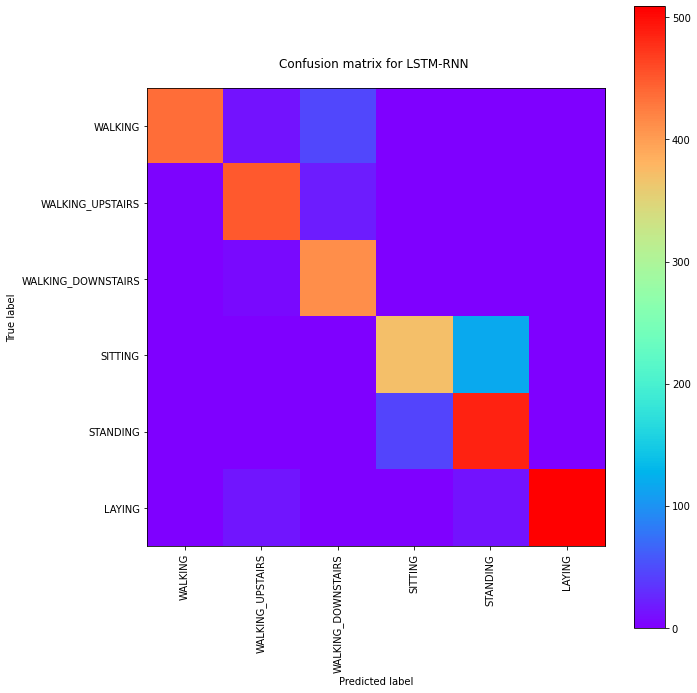

In [ ]:
#visualiZation of the result


#print("Testing Accuracy: {}%".format(100*accuracy))

#print("")
#print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
#print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
#print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))
#normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100
#print("Confusion matrix (normalised to % of total test data):")
#print(normalised_confusion_matrix)

width = 10
height = 10
plt.figure(figsize=(width, height))
plt.imshow(
    confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix for LSTM-RNN \n")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()